--- 
# Part 1: Overview & EDA

--- 

## Problem Statement

Conducting analysis on your customer base and sending personalized campaigns to high value targets has massive benefits in any industry. Using unsupervised learning, I will seek to implement cluster analysis for customer segmentation and targeted marketing outreach.

## Contents

- [Overview](#Overview)
- [References](#References)
- [Data Import & Cleaning](#Part-2-:-Data-Import-&-Cleaning)
- [Exploratory Data Analysis](#Part-3:-Exploratory-Data-Analysis)
- [Feature Engineering](#Feature-Engineering)
- [Data Dictionary](#Data-Dictionary)

## Overview

Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately. The goal is to maximize the value of each customer to the business. In business-to-consumer marketing, companies like Starbucks often segment customers according to demographics that include:

- Age
- Gender
- Location (urban, suburban, rural)
- Products previously purchased from the company
- Other demographics like life stage (single, married, divorced, empty-nester, retired, etc.)

Why segment customers?
- Create and communicate targeted marketing messages that will resonate with specific groups of customers, but not with others (who will receive messages tailored to their needs and interests, instead).
- Select the best communication channel for the segment, which might be email, social media posts, radio advertising, or another approach, depending on the segment. 
- Identify ways to improve products or new product or service opportunities.
- Establish better customer relationships.
- Test pricing options.
- Focus on the most profitable customers.
- Improve customer service.
- Upsell and cross-sell other products and services.

There is simulated Starbucks customer data that includes transactions, demographics and offer data like BOGO offers.
This data was provided by Starbucks to simulate their customers and transactions to see if there are better approaches to sending customers specific promotional deals. The dataset includes 306,534 events related to 17,000 customers and 10 event types over the course of a 30-day experiment.

customer segmentation and deep dive into each cluster - EDA before and after


PCA

DBSCAN

- portfolio.csv - containing offer ids and meta data about each offer (duration, type, etc.)

Information about the promotional offers that are possible to receive, and basic information about each one including the promotional type, duration of the promotion, reward, and how the promotion was distributed to customers

- profile.csv - demographic data for each customer

Dimensional data about each person, including their age, salary, and gender. There is one unique customer for each record.

- transcript.csv - records for transactions, offers received, offers viewed, and offers completed

Records show the different steps of promotional offers that a customer received. The different values of receiving a promotion are receiving, viewing, and completing. You also see the different transactions that a person made in the time since he became a customer. With all records, you see the day that they interacted with Starbucks and the amount that it is worth.

# References

1. Data Source: https://www.kaggle.com/ihormuliar/starbucks-customer-data
2. https://seifip.medium.com/starbucks-offers-advanced-customer-segmentation-with-python-737f22e245a4
3. https://www.barilliance.com/rfm-analysis/
4. https://formation.ai/blog/how-starbucks-became-1-in-customer-loyalty/
5. https://lifetimes.readthedocs.io/en/latest/
6. https://www.natasshaselvaraj.com/customer-segmentation-with-python/

## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
    
pd.set_option('display.max_rows', None)
sns.set_palette('Greens_r')

## Data Import 

In [2]:
transcript = pd.read_csv('./data/transcript.csv')
portfolio = pd.read_csv('./data/portfolio.csv')
profile = pd.read_csv('./data/profile.csv')

transcript.head()

Unnamed: 0                            person           event  \
0           0  78afa995795e4d85b5d9ceeca43f5fef  offer received   
1           1  a03223e636434f42ac4c3df47e8bac43  offer received   
2           2  e2127556f4f64592b11af22de27a7932  offer received   
3           3  8ec6ce2a7e7949b1bf142def7d0e0586  offer received   
4           4  68617ca6246f4fbc85e91a2a49552598  offer received   

                                              value  time  
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0  
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0  
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0  
3  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}     0  
4  {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}     0

In [3]:
portfolio.head()

Unnamed: 0  reward                              channels  difficulty  \
0           0      10         ['email', 'mobile', 'social']          10   
1           1      10  ['web', 'email', 'mobile', 'social']          10   
2           2       0            ['web', 'email', 'mobile']           0   
3           3       5            ['web', 'email', 'mobile']           5   
4           4       5                      ['web', 'email']          20   

   duration     offer_type                                id  
0         7           bogo  ae264e3637204a6fb9bb56bc8210ddfd  
1         5           bogo  4d5c57ea9a6940dd891ad53e9dbe8da0  
2         4  informational  3f207df678b143eea3cee63160fa8bed  
3         7           bogo  9b98b8c7a33c4b65b9aebfe6a799e6d9  
4        10       discount  0b1e1539f2cc45b7b9fa7c272da2e1d7

In [4]:
profile.head()

Unnamed: 0 gender  age                                id  became_member_on  \
0           0    NaN  118  68be06ca386d4c31939f3a4f0e3dd783          20170212   
1           1      F   55  0610b486422d4921ae7d2bf64640c50b          20170715   
2           2    NaN  118  38fe809add3b4fcf9315a9694bb96ff5          20180712   
3           3      F   75  78afa995795e4d85b5d9ceeca43f5fef          20170509   
4           4    NaN  118  a03223e636434f42ac4c3df47e8bac43          20170804   

     income  
0       NaN  
1  112000.0  
2       NaN  
3  100000.0  
4       NaN

In [5]:
# Drop Unnamed index column

transcript.drop(columns = ['Unnamed: 0'], inplace = True)
portfolio.drop(columns = ['Unnamed: 0'], inplace = True)
profile.drop(columns = ['Unnamed: 0'], inplace = True)

profile.head()

gender  age                                id  became_member_on    income
0    NaN  118  68be06ca386d4c31939f3a4f0e3dd783          20170212       NaN
1      F   55  0610b486422d4921ae7d2bf64640c50b          20170715  112000.0
2    NaN  118  38fe809add3b4fcf9315a9694bb96ff5          20180712       NaN
3      F   75  78afa995795e4d85b5d9ceeca43f5fef          20170509  100000.0
4    NaN  118  a03223e636434f42ac4c3df47e8bac43          20170804       NaN

In [6]:
transcript.shape, portfolio.shape, profile.shape

((306534, 4), (10, 6), (17000, 5))

## Portfolio Data

In [7]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [8]:
portfolio.describe()

reward  difficulty   duration
count  10.000000   10.000000  10.000000
mean    4.200000    7.700000   6.500000
std     3.583915    5.831905   2.321398
min     0.000000    0.000000   3.000000
25%     2.000000    5.000000   5.000000
50%     4.000000    8.500000   7.000000
75%     5.000000   10.000000   7.000000
max    10.000000   20.000000  10.000000

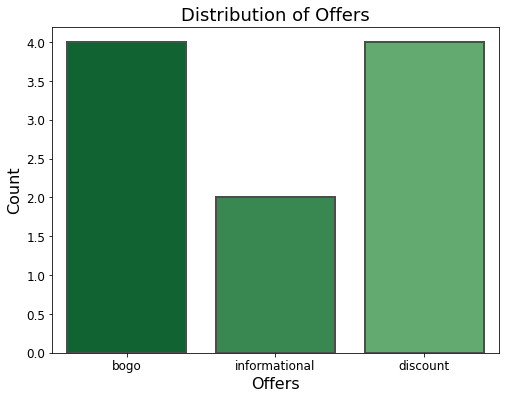

In [9]:
plt.figure(figsize = (8,6))
sns.countplot(data = portfolio, x = 'offer_type', edgecolor=".3", linewidth=2)
plt.title('Distribution of Offers', size = 18)
plt.ylabel('Count', size = 16)
plt.xlabel('Offers', size = 16)
plt.xticks(size = 12)
plt.yticks(size = 12);

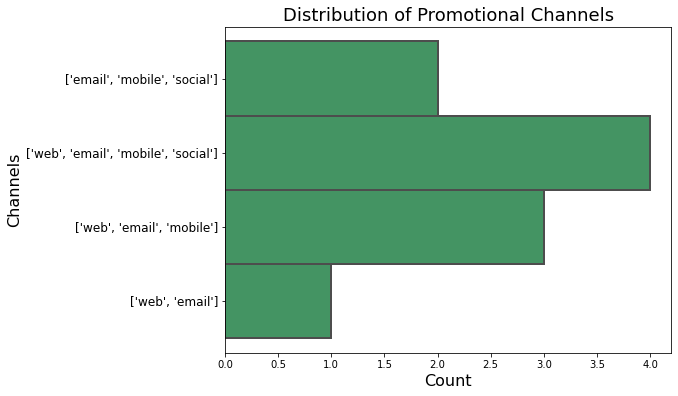

In [10]:
plt.figure(figsize = (8,6))
sns.histplot(portfolio, y = 'channels', edgecolor=".3", linewidth=2)
plt.title('Distribution of Promotional Channels', size = 18)
plt.ylabel('Channels', size = 16)
plt.xlabel('Count', size = 16)
plt.yticks(size = 12);

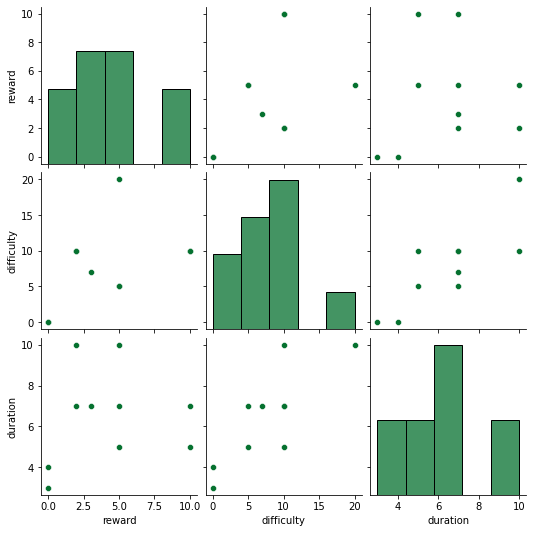

In [11]:
sns.pairplot(portfolio);

In [12]:
portfolio.rename(columns={'id': 'offer_id'}, inplace=True)
portfolio.head()

reward                              channels  difficulty  duration  \
0      10         ['email', 'mobile', 'social']          10         7   
1      10  ['web', 'email', 'mobile', 'social']          10         5   
2       0            ['web', 'email', 'mobile']           0         4   
3       5            ['web', 'email', 'mobile']           5         7   
4       5                      ['web', 'email']          20        10   

      offer_type                          offer_id  
0           bogo  ae264e3637204a6fb9bb56bc8210ddfd  
1           bogo  4d5c57ea9a6940dd891ad53e9dbe8da0  
2  informational  3f207df678b143eea3cee63160fa8bed  
3           bogo  9b98b8c7a33c4b65b9aebfe6a799e6d9  
4       discount  0b1e1539f2cc45b7b9fa7c272da2e1d7

In [13]:
portfolio['offer_id'].unique()

array(['ae264e3637204a6fb9bb56bc8210ddfd',
       '4d5c57ea9a6940dd891ad53e9dbe8da0',
       '3f207df678b143eea3cee63160fa8bed',
       '9b98b8c7a33c4b65b9aebfe6a799e6d9',
       '0b1e1539f2cc45b7b9fa7c272da2e1d7',
       '2298d6c36e964ae4a3e7e9706d1fb8c2',
       'fafdcd668e3743c1bb461111dcafc2a4',
       '5a8bc65990b245e5a138643cd4eb9837',
       'f19421c1d4aa40978ebb69ca19b0e20d',
       '2906b810c7d4411798c6938adc9daaa5'], dtype=object)

In [14]:
portfolio['offer_id_modified'] = portfolio['offer_id'].replace({'ae264e3637204a6fb9bb56bc8210ddfd': 'offer_1', 
                                                               '4d5c57ea9a6940dd891ad53e9dbe8da0': 'offer_2',
                                                               '3f207df678b143eea3cee63160fa8bed': 'offer_3',
                                                               '9b98b8c7a33c4b65b9aebfe6a799e6d9': 'offer_4',
                                                               '0b1e1539f2cc45b7b9fa7c272da2e1d7': 'offer_5',
                                                               '2298d6c36e964ae4a3e7e9706d1fb8c2': 'offer_6',
                                                               'fafdcd668e3743c1bb461111dcafc2a4': 'offer_7',
                                                               '5a8bc65990b245e5a138643cd4eb9837': 'offer_8',
                                                               'f19421c1d4aa40978ebb69ca19b0e20d': 'offer_9',
                                                               '2906b810c7d4411798c6938adc9daaa5': 'offer_10'})
portfolio['offer_id_modified'].unique()

array(['offer_1', 'offer_2', 'offer_3', 'offer_4', 'offer_5', 'offer_6',
       'offer_7', 'offer_8', 'offer_9', 'offer_10'], dtype=object)

In [15]:
portfolio['channels'].value_counts()

['web', 'email', 'mobile', 'social']    4
['web', 'email', 'mobile']              3
['email', 'mobile', 'social']           2
['web', 'email']                        1
Name: channels, dtype: int64

In [16]:
# Unnesting the channels column and giving it a binary value if the offer contains that channel

def email(portfolio):
    if 'email' in portfolio['channels']:
        val = 1
    else:
        val = 0
    return val

def mobile(portfolio):
    if 'mobile' in portfolio['channels']:
        val = 1
    else:
        val = 0
    return val

def web(portfolio):
    if 'web' in portfolio['channels']:
        val = 1
    else:
        val = 0
    return val

def social(portfolio):
    if 'social' in portfolio['channels']:
        val = 1
    else:
        val = 0
    return val

portfolio['email'] = portfolio.apply(email, axis=1)
portfolio['mobile'] = portfolio.apply(mobile, axis=1)
portfolio['web'] = portfolio.apply(web, axis=1)
portfolio['social'] = portfolio.apply(social, axis=1)
portfolio.head(10)

reward                              channels  difficulty  duration  \
0      10         ['email', 'mobile', 'social']          10         7   
1      10  ['web', 'email', 'mobile', 'social']          10         5   
2       0            ['web', 'email', 'mobile']           0         4   
3       5            ['web', 'email', 'mobile']           5         7   
4       5                      ['web', 'email']          20        10   
5       3  ['web', 'email', 'mobile', 'social']           7         7   
6       2  ['web', 'email', 'mobile', 'social']          10        10   
7       0         ['email', 'mobile', 'social']           0         3   
8       5  ['web', 'email', 'mobile', 'social']           5         5   
9       2            ['web', 'email', 'mobile']          10         7   

      offer_type                          offer_id offer_id_modified  email  \
0           bogo  ae264e3637204a6fb9bb56bc8210ddfd           offer_1      1   
1           bogo  4d5c57ea9a6940dd891ad53e9dbe8da0           offer_2      1   
2  informational  3f207df678b143eea3cee63160fa8bed           offer_3      1   
3           bogo  9b98b8c7a33c4b65b9aebfe6a799e6d9           offer_4      1   
4       discount  0b1e1539f2cc45b7b9fa7c272da2e1d7           offer_5      1   
5       discount  2298d6c36e964ae4a3e7e9706d1fb8c2           offer_6      1   
6       discount  fafdcd668e3743c1bb461111dcafc2a4           offer_7      1   
7  informational  5a8bc65990b245e5a138643cd4eb9837           offer_8      1   
8           bogo  f19421c1d4aa40978ebb69ca19b0e20d           offer_9      1   
9       discount  2906b810c7d4411798c6938adc9daaa5          offer_10      1   

   mobile  web  social  
0       1    0       1  
1       1    1       1  
2       1    1       0  
3       1    1       0  
4       0    1       0  
5       1    1       1  
6       1    1       1  
7       1    0       1  
8       1    1       1  
9       1    1       0

In [17]:
final_portfolio = portfolio.drop(columns = ['channels', 'offer_id'])

In [18]:
final_portfolio.head()

reward  difficulty  duration     offer_type offer_id_modified  email  \
0      10          10         7           bogo           offer_1      1   
1      10          10         5           bogo           offer_2      1   
2       0           0         4  informational           offer_3      1   
3       5           5         7           bogo           offer_4      1   
4       5          20        10       discount           offer_5      1   

   mobile  web  social  
0       1    0       1  
1       1    1       1  
2       1    1       0  
3       1    1       0  
4       0    1       0

In [19]:
final_portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   reward             10 non-null     int64 
 1   difficulty         10 non-null     int64 
 2   duration           10 non-null     int64 
 3   offer_type         10 non-null     object
 4   offer_id_modified  10 non-null     object
 5   email              10 non-null     int64 
 6   mobile             10 non-null     int64 
 7   web                10 non-null     int64 
 8   social             10 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 848.0+ bytes


**Observations:**
- channels and offer_type need to be one hot encoded
- portfolio['id'] == 'offer_id' in transcript['value'] so I renamed 'id' to 'offer_id'
- instead of the string of characters for offer_id I created a column that has a more interpretable offer name like offer_1, offer_2 etc
- unnested the list in channels

## Profile Data

In [20]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [21]:
# Convert dates to Datetime
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')

profile.dtypes

gender                      object
age                          int64
id                          object
became_member_on    datetime64[ns]
income                     float64
dtype: object

In [22]:
# Breaking up the date from became_member_on to be able to use for clustering
# Split out became_member_on into year, month and day, and calculate total membership_days using today
profile['year'] = profile['became_member_on'].dt.year
profile['month'] = profile['became_member_on'].dt.month
profile['day']=profile['became_member_on'].dt.day_name()
profile['membership_days'] = (pd.to_datetime('today') - profile['became_member_on']).astype('timedelta64[D]').astype(int)
profile.head(3)

gender  age                                id became_member_on    income  \
0    NaN  118  68be06ca386d4c31939f3a4f0e3dd783       2017-02-12       NaN   
1      F   55  0610b486422d4921ae7d2bf64640c50b       2017-07-15  112000.0   
2    NaN  118  38fe809add3b4fcf9315a9694bb96ff5       2018-07-12       NaN   

   year  month       day  membership_days  
0  2017      2    Sunday             1675  
1  2017      7  Saturday             1522  
2  2018      7  Thursday             1160

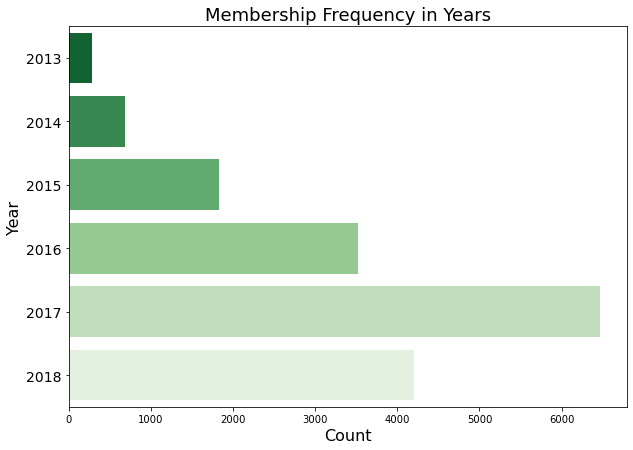

In [23]:
plt.figure(figsize=(10,7))
ax = sns.countplot(y="year", data=profile)
plt.title('Membership Frequency in Years', size = 18)
plt.xlabel('Count', size = 16)
plt.yticks(size = 14)
plt.ylabel('Year', size = 16)
plt.savefig('./images/membership_freq.png');

In [24]:
# Impute NaN genders with 'Blank' 
# Not filling with 'O' (other) group as it most likely represents gender nonbinary, leaving it blank isn't the same thing
profile['gender_modified'] = profile['gender'].fillna('Blank')

profile['gender_modified'].value_counts(normalize = True)

M        0.499059
F        0.360529
Blank    0.127941
O        0.012471
Name: gender_modified, dtype: float64

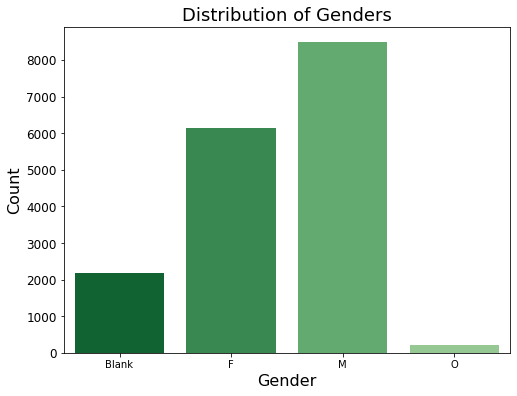

In [25]:
plt.figure(figsize = (8,6))
sns.countplot(data=profile,x='gender_modified')
plt.title('Distribution of Genders', size = 18)
plt.ylabel('Count', size = 16)
plt.xlabel('Gender', size = 16)
plt.yticks(size = 12);

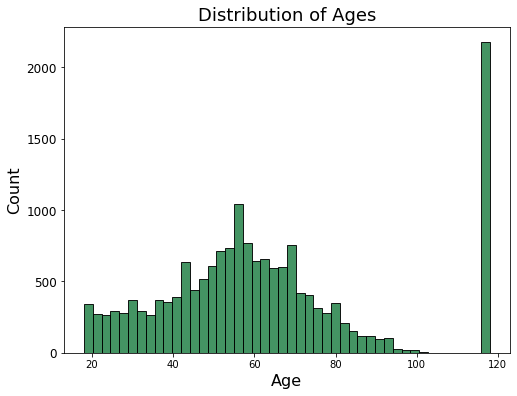

In [26]:
plt.figure(figsize = (8,6))
sns.histplot(data=profile,x='age')
plt.title('Distribution of Ages', size = 18)
plt.ylabel('Count', size = 16)
plt.xlabel('Age', size = 16)
plt.yticks(size = 12);

In [27]:
# Fix outlier in Age - all NaNs in Age correspond with the NaNs in Gender
profile[profile['age']==118]['gender'].value_counts()

Series([], Name: gender, dtype: int64)

In [28]:
# Imputing with random sampling of age to maintain distribution
#profile['age_modified']= profile['age'].apply(lambda x : 54 if x == 118 else x)
profile['age_modified'] = profile['age'].apply(lambda x: np.random.choice(profile[profile['age'] != 118]['age']) 
                                               if x == 118 else x)

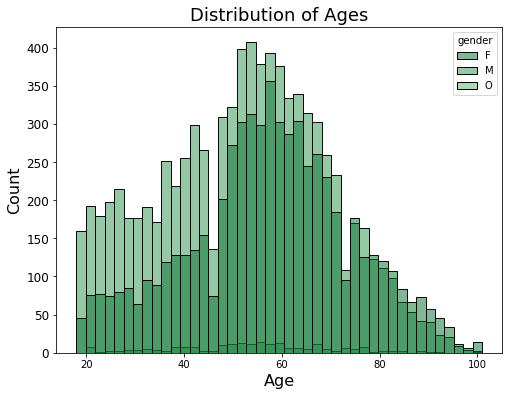

In [29]:
plt.figure(figsize = (8,6))
sns.histplot(data=profile,x='age_modified', hue='gender')
plt.title('Distribution of Ages', size = 18)
plt.ylabel('Count', size = 16)
plt.xlabel('Age', size = 16)
plt.yticks(size = 12);

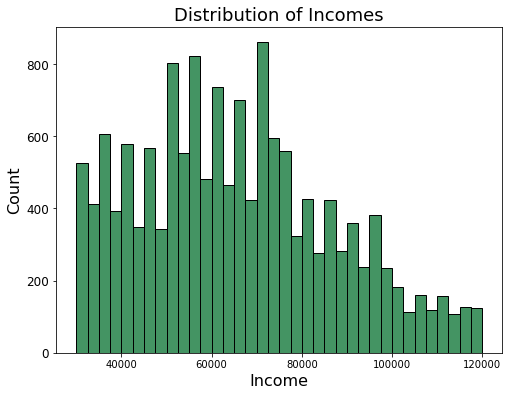

In [30]:
plt.figure(figsize = (8,6))
sns.histplot(data=profile,x='income')
plt.title('Distribution of Incomes', size = 18)
plt.ylabel('Count', size = 16)
plt.xlabel('Income', size = 16)
plt.yticks(size = 12);

In [31]:
profile[profile['income'].isnull()].groupby('gender').count()['income']

Series([], Name: income, dtype: int64)

In [32]:
# Fill empty incomes - impute with random sample of non null values
profile['income_modified']= profile['income'].apply(
    lambda x: np.random.choice(profile['income'].dropna().values) if np.isnan(x) else x).astype(int)

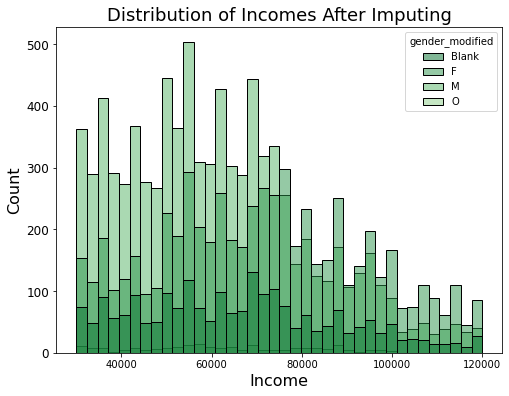

In [33]:
plt.figure(figsize = (8,6))
sns.histplot(data=profile,x='income_modified', hue='gender_modified')
plt.title('Distribution of Incomes After Imputing', size = 18)
plt.ylabel('Count', size = 16)
plt.xlabel('Income', size = 16)
plt.yticks(size = 12)
plt.savefig('./images/income_gender_dist.png');

In [34]:
profile.describe()

age         income          year         month  \
count  17000.000000   14825.000000  17000.000000  17000.000000   
mean      62.531412   65404.991568   2016.635000      6.683529   
std       26.738580   21598.299410      1.177624      3.487098   
min       18.000000   30000.000000   2013.000000      1.000000   
25%       45.000000   49000.000000   2016.000000      4.000000   
50%       58.000000   64000.000000   2017.000000      7.000000   
75%       73.000000   80000.000000   2017.000000     10.000000   
max      118.000000  120000.000000   2018.000000     12.000000   

       membership_days  age_modified  income_modified  
count     17000.000000  17000.000000     17000.000000  
mean       1663.449882     54.390588     65482.941176  
std         411.223904     17.399475     21607.346151  
min        1146.000000     18.000000     30000.000000  
25%        1354.000000     42.000000     49000.000000  
50%        1504.000000     55.000000     64000.000000  
75%        1937.000000     66.000000     80000.000000  
max        2969.000000    101.000000    120000.000000

In [35]:
#sns.pairplot(profile);

In [36]:
final_profile = profile.drop(columns = ['gender', 'age', 'income','became_member_on'])

In [37]:
# Rename 'id' to 'customer_id' and other modified columns just for more clarity
final_profile.rename(columns={'id': 'customer_id', 
                        'gender_modified': 'gender',
                        'age_modified': 'age',
                        'income_modified': 'income'}, inplace=True)
final_profile.head()

customer_id  year  month       day  membership_days  \
0  68be06ca386d4c31939f3a4f0e3dd783  2017      2    Sunday             1675   
1  0610b486422d4921ae7d2bf64640c50b  2017      7  Saturday             1522   
2  38fe809add3b4fcf9315a9694bb96ff5  2018      7  Thursday             1160   
3  78afa995795e4d85b5d9ceeca43f5fef  2017      5   Tuesday             1589   
4  a03223e636434f42ac4c3df47e8bac43  2017      8    Friday             1502   

  gender  age  income  
0  Blank   57   44000  
1      F   55  112000  
2  Blank   55   65000  
3      F   75  100000  
4  Blank   66   89000

**Observations:**
- 'became_member_on' changed to a datetime data type
- 'age' had 2175 outliers of age 118. These were all from the NaN gender group and NaN incomes- imputed using the avg age of the 'O' gender group
- 'gender' had 2175 NaNs I imputed with the 'O' group
- 'income' also had 2175 NaNs so I imputed using the avg income of the 'O' gender group
- profile['id'] == transcript['person']
- Need to one hot encode 'gender', 'year', 'month', 'day'
- The majority of customers in the dataset are male.

## Transcript Data

In [38]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [39]:
transcript.head()

person           event  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received   
1  a03223e636434f42ac4c3df47e8bac43  offer received   
2  e2127556f4f64592b11af22de27a7932  offer received   
3  8ec6ce2a7e7949b1bf142def7d0e0586  offer received   
4  68617ca6246f4fbc85e91a2a49552598  offer received   

                                              value  time  
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0  
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0  
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0  
3  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}     0  
4  {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}     0

In [40]:
transcript.tail()

person        event  \
306529  b3a1272bc9904337b331bf348c3e8c17  transaction   
306530  68213b08d99a4ae1b0dcb72aebd9aa35  transaction   
306531  a00058cf10334a308c68e7631c529907  transaction   
306532  76ddbd6576844afe811f1a3c0fbb5bec  transaction   
306533  c02b10e8752c4d8e9b73f918558531f7  transaction   

                                 value  time  
306529  {'amount': 1.5899999999999999}   714  
306530                {'amount': 9.53}   714  
306531                {'amount': 3.61}   714  
306532  {'amount': 3.5300000000000002}   714  
306533                {'amount': 4.05}   714

In [41]:
transcript['event'].value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [42]:
# transcript['person'] == profile['id']
# Change column name from 'person' to 'id' in order to merge the dataframes

transcript.rename(columns={'person':'customer_id'}, inplace=True)

In [43]:
# Extract out just the actual 'offer_id' and 'amount' from 'value' column

transaction = transcript.loc[transcript['event'] == 'transaction']
offer = transcript.loc[transcript['event'] != 'transaction']

pattern = re.compile('[\d]+.[\d]+')
transaction['value'] = transaction['value'].apply(pattern.findall).str.get(0)
transaction.rename(columns={'value': 'amount'}, inplace=True)
transaction = transaction.astype(dtype={'amount': 'float'})
transaction.head()

<ipython-input-43-54cd6c323642>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction['value'] = transaction['value'].apply(pattern.findall).str.get(0)
/Users/emilysiegel/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


customer_id        event  amount  time
12654  02c083884c7d45b39cc68e1314fec56c  transaction    0.83     0
12657  9fa9ae8f57894cc9a3b8a9bbe0fc1b2f  transaction   34.56     0
12659  54890f68699049c2a04d415abc25e717  transaction   13.23     0
12670  b2f1cd155b864803ad8334cdf13c4bd2  transaction   19.51     0
12671  fe97aa22dd3e48c8b143116a8403dd52  transaction   18.97     0

In [44]:
pattern = re.compile('[\w]+[\w]+')
offer['value'] = offer['value'].apply(pattern.findall).str.get(2)
offer.rename(columns={'value': 'offer id'}, inplace=True)
offer = offer.astype(dtype={'offer id': 'object'})
offer.head()

<ipython-input-44-1cb10ae4a701>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offer['value'] = offer['value'].apply(pattern.findall).str.get(2)
/Users/emilysiegel/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


customer_id           event  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received   
1  a03223e636434f42ac4c3df47e8bac43  offer received   
2  e2127556f4f64592b11af22de27a7932  offer received   
3  8ec6ce2a7e7949b1bf142def7d0e0586  offer received   
4  68617ca6246f4fbc85e91a2a49552598  offer received   

                           offer id  time  
0  9b98b8c7a33c4b65b9aebfe6a799e6d9     0  
1  0b1e1539f2cc45b7b9fa7c272da2e1d7     0  
2  2906b810c7d4411798c6938adc9daaa5     0  
3  fafdcd668e3743c1bb461111dcafc2a4     0  
4  4d5c57ea9a6940dd891ad53e9dbe8da0     0

In [45]:
offer['offer id'].value_counts()

reward                              33579
2298d6c36e964ae4a3e7e9706d1fb8c2    14983
fafdcd668e3743c1bb461111dcafc2a4    14924
4d5c57ea9a6940dd891ad53e9dbe8da0    14891
f19421c1d4aa40978ebb69ca19b0e20d    14835
ae264e3637204a6fb9bb56bc8210ddfd    14374
5a8bc65990b245e5a138643cd4eb9837    14305
9b98b8c7a33c4b65b9aebfe6a799e6d9    11848
3f207df678b143eea3cee63160fa8bed    11761
2906b810c7d4411798c6938adc9daaa5    11750
0b1e1539f2cc45b7b9fa7c272da2e1d7    10331
Name: offer id, dtype: int64

In [46]:
# Simplify the offer id to match the portfolio['offer_id_modified']
offer['offer_id_modified'] = offer['offer id'].replace({'ae264e3637204a6fb9bb56bc8210ddfd': 'offer_1', 
                                                               '4d5c57ea9a6940dd891ad53e9dbe8da0': 'offer_2',
                                                               '3f207df678b143eea3cee63160fa8bed': 'offer_3',
                                                               '9b98b8c7a33c4b65b9aebfe6a799e6d9': 'offer_4',
                                                               '0b1e1539f2cc45b7b9fa7c272da2e1d7': 'offer_5',
                                                               '2298d6c36e964ae4a3e7e9706d1fb8c2': 'offer_6',
                                                               'fafdcd668e3743c1bb461111dcafc2a4': 'offer_7',
                                                               '5a8bc65990b245e5a138643cd4eb9837': 'offer_8',
                                                               'f19421c1d4aa40978ebb69ca19b0e20d': 'offer_9',
                                                               '2906b810c7d4411798c6938adc9daaa5': 'offer_10'})
offer['offer_id_modified'].unique()

array(['offer_4', 'offer_5', 'offer_10', 'offer_7', 'offer_2', 'offer_9',
       'offer_6', 'offer_3', 'offer_1', 'offer_8', 'reward'], dtype=object)

In [47]:
offer = offer.drop(columns =['offer id'])
offer.head()

customer_id           event  time offer_id_modified
0  78afa995795e4d85b5d9ceeca43f5fef  offer received     0           offer_4
1  a03223e636434f42ac4c3df47e8bac43  offer received     0           offer_5
2  e2127556f4f64592b11af22de27a7932  offer received     0          offer_10
3  8ec6ce2a7e7949b1bf142def7d0e0586  offer received     0           offer_7
4  68617ca6246f4fbc85e91a2a49552598  offer received     0           offer_2

**Observations:**
- 'time' convert from int to days possibly
- transcript['person'] == profile['customer_id']
- 'offer_id' in transcript['value'] == portfolio['offer_id']
- From 'value' extracted out just the actual 'offer_id' and 'amount'
- Need to one hot encode 'event', 'offer_id_modified'

## Merge Datasets

In [48]:
final_portfolio.shape, final_profile.shape, offer.shape, transaction.shape

((10, 9), (17000, 8), (167581, 4), (138953, 4))

In [49]:
final_offers = offer.merge(final_profile, left_on='customer_id', right_on='customer_id')
final_offers = final_offers.merge(final_portfolio, left_on='offer_id_modified', right_on='offer_id_modified')
#final_offers.set_index('offer_id_modified', inplace=True)
final_offers.head()

customer_id           event  time offer_id_modified  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received     0           offer_4   
1  78afa995795e4d85b5d9ceeca43f5fef    offer viewed     6           offer_4   
2  e2127556f4f64592b11af22de27a7932  offer received   408           offer_4   
3  e2127556f4f64592b11af22de27a7932    offer viewed   420           offer_4   
4  68617ca6246f4fbc85e91a2a49552598  offer received   504           offer_4   

   year  month       day  membership_days gender  age  income  reward  \
0  2017      5   Tuesday             1589      F   75  100000       5   
1  2017      5   Tuesday             1589      F   75  100000       5   
2  2018      4  Thursday             1237      M   68   70000       5   
3  2018      4  Thursday             1237      M   68   70000       5   
4  2017     10    Monday             1443  Blank   96   37000       5   

   difficulty  duration offer_type  email  mobile  web  social  
0           5         7       bogo      1       1    1       0  
1           5         7       bogo      1       1    1       0  
2           5         7       bogo      1       1    1       0  
3           5         7       bogo      1       1    1       0  
4           5         7       bogo      1       1    1       0

In [50]:
final_offers.rename(columns=
                  {'time':'time_hours',
                   'offer_id_modified': 'offer_id'
                  }, inplace=True)

In [51]:
final_offers.shape

(134002, 19)

In [52]:
final_transactions = transaction.merge(final_profile, left_on='customer_id', right_on='customer_id')
final_transactions.drop(['event'], axis=1, inplace=True)
final_transactions.head()

customer_id  amount  time  year  month     day  \
0  02c083884c7d45b39cc68e1314fec56c    0.83     0  2016      7  Monday   
1  02c083884c7d45b39cc68e1314fec56c    1.44     6  2016      7  Monday   
2  02c083884c7d45b39cc68e1314fec56c    4.56    12  2016      7  Monday   
3  02c083884c7d45b39cc68e1314fec56c    1.53    84  2016      7  Monday   
4  02c083884c7d45b39cc68e1314fec56c    0.50    90  2016      7  Monday   

   membership_days gender  age  income  
0             1891      F   20   30000  
1             1891      F   20   30000  
2             1891      F   20   30000  
3             1891      F   20   30000  
4             1891      F   20   30000

There can be multiple transactions for the same customer_id.

In [53]:
final_transactions.rename(columns=
                  {'time': 'time_hours'
                  }, inplace=True)

In [54]:
final_transactions.shape

(138953, 10)

## One-hot encode rest of categorical features

For final_offers: event, offer_id, gender, offer_type

For final_transactions: gender

In [55]:
offers_dummy_cols =final_offers.select_dtypes(include=['object'])
offers_dummy_cols.columns

Index(['customer_id', 'event', 'offer_id', 'day', 'gender', 'offer_type'], dtype='object')

In [56]:
offers_dummy_cols = offers_dummy_cols.drop(columns=['customer_id'])

In [57]:
# Don't use drop_first on dummified columns for clustering - you want all classes represented
final_offers = pd.get_dummies(final_offers, columns=offers_dummy_cols.columns)
final_offers = pd.get_dummies(final_offers, columns=['month'])
final_offers.head()

customer_id  time_hours  year  membership_days  age  \
0  78afa995795e4d85b5d9ceeca43f5fef           0  2017             1589   75   
1  78afa995795e4d85b5d9ceeca43f5fef           6  2017             1589   75   
2  e2127556f4f64592b11af22de27a7932         408  2018             1237   68   
3  e2127556f4f64592b11af22de27a7932         420  2018             1237   68   
4  68617ca6246f4fbc85e91a2a49552598         504  2017             1443   96   

   income  reward  difficulty  duration  email  ...  month_3  month_4  \
0  100000       5           5         7      1  ...        0        0   
1  100000       5           5         7      1  ...        0        0   
2   70000       5           5         7      1  ...        0        1   
3   70000       5           5         7      1  ...        0        1   
4   37000       5           5         7      1  ...        0        0   

   month_5  month_6  month_7  month_8  month_9  month_10  month_11  month_12  
0        1        0        0        0        0         0         0         0  
1        1        0        0        0        0         0         0         0  
2        0        0        0        0        0         0         0         0  
3        0        0        0        0        0         0         0         0  
4        0        0        0        0        0         1         0         0  

[5 rows x 51 columns]

In [58]:
final_offers.shape

(134002, 51)

In [59]:
final_offers.columns

Index(['customer_id', 'time_hours', 'year', 'membership_days', 'age', 'income',
       'reward', 'difficulty', 'duration', 'email', 'mobile', 'web', 'social',
       'event_offer received', 'event_offer viewed', 'offer_id_offer_1',
       'offer_id_offer_10', 'offer_id_offer_2', 'offer_id_offer_3',
       'offer_id_offer_4', 'offer_id_offer_5', 'offer_id_offer_6',
       'offer_id_offer_7', 'offer_id_offer_8', 'offer_id_offer_9',
       'day_Friday', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'gender_Blank',
       'gender_F', 'gender_M', 'gender_O', 'offer_type_bogo',
       'offer_type_discount', 'offer_type_informational', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object')

In [60]:
transactions_dummy_cols =final_transactions.select_dtypes(include=['object'])
transactions_dummy_cols.columns

Index(['customer_id', 'day', 'gender'], dtype='object')

In [61]:
transactions_dummy_cols = transactions_dummy_cols.drop(columns=['customer_id'])

In [62]:
final_transactions = pd.get_dummies(final_transactions, columns=transactions_dummy_cols.columns)
final_transactions = pd.get_dummies(final_transactions, columns=['month'])
final_transactions.head()

customer_id  amount  time_hours  year  \
0  02c083884c7d45b39cc68e1314fec56c    0.83           0  2016   
1  02c083884c7d45b39cc68e1314fec56c    1.44           6  2016   
2  02c083884c7d45b39cc68e1314fec56c    4.56          12  2016   
3  02c083884c7d45b39cc68e1314fec56c    1.53          84  2016   
4  02c083884c7d45b39cc68e1314fec56c    0.50          90  2016   

   membership_days  age  income  day_Friday  day_Monday  day_Saturday  ...  \
0             1891   20   30000           0           1             0  ...   
1             1891   20   30000           0           1             0  ...   
2             1891   20   30000           0           1             0  ...   
3             1891   20   30000           0           1             0  ...   
4             1891   20   30000           0           1             0  ...   

   month_3  month_4  month_5  month_6  month_7  month_8  month_9  month_10  \
0        0        0        0        0        1        0        0         0   
1        0        0        0        0        1        0        0         0   
2        0        0        0        0        1        0        0         0   
3        0        0        0        0        1        0        0         0   
4        0        0        0        0        1        0        0         0   

   month_11  month_12  
0         0         0  
1         0         0  
2         0         0  
3         0         0  
4         0         0  

[5 rows x 30 columns]

In [63]:
final_transactions.shape

(138953, 30)

## More Feature Engineering

In [64]:
# final_offers['time'] = final_offers['time'] + 0.5
# final_offers['received_time'] = final_offers['offer_received'] * final_offers['time']
# final_offers['viewed_time'] = final_offers['offer_viewed'] * final_offers['time']
# final_offers['completed_time'] = final_offers['offer_completed'] * final_offers['time']
# final_offers.head()

## Save Final Cleaned & Merged Files

In [65]:
final_offers.to_csv('./data/final_offers_clean.csv', index = False)
final_transactions.to_csv('./data/final_transactions_clean.csv', index = False)

## More EDA

In [66]:
# Check for repeat offers?
final_offers[final_offers.duplicated(subset=['offer_id', 'customer_id'], keep=False)].head()

customer_id           event  time_hours offer_id  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received           0  offer_4   
1  78afa995795e4d85b5d9ceeca43f5fef    offer viewed           6  offer_4   
2  e2127556f4f64592b11af22de27a7932  offer received         408  offer_4   
3  e2127556f4f64592b11af22de27a7932    offer viewed         420  offer_4   
4  68617ca6246f4fbc85e91a2a49552598  offer received         504  offer_4   

   year  month       day  membership_days gender  age  income  reward  \
0  2017      5   Tuesday             1589      F   75  100000       5   
1  2017      5   Tuesday             1589      F   75  100000       5   
2  2018      4  Thursday             1237      M   68   70000       5   
3  2018      4  Thursday             1237      M   68   70000       5   
4  2017     10    Monday             1443  Blank   58   48000       5   

   difficulty  duration offer_type  email  mobile  web  social  
0           5         7       bogo      1       1    1       0  
1           5         7       bogo      1       1    1       0  
2           5         7       bogo      1       1    1       0  
3           5         7       bogo      1       1    1       0  
4           5         7       bogo      1       1    1       0

There can be duplicate offers for the different events for the same customer_id - offer received and offer viewed events

In [73]:
# Create a time group column and bin by certain ranges of days
offer['time_group'] = pd.cut(x=offer['time'], bins=[0, 100, 200, 300, 400, 500,600,700,800], include_lowest=True,
                    labels=['0-100 days', '100-200 days', '200-300 days', '300-400 days', '400-500 days', 
                            '500-600 days', '600-700 days', '700-800 days'])

transaction['time_group'] = pd.cut(x=transaction['time'], bins=[0, 100, 200, 300, 400, 500,600,700,800], include_lowest=True,
                    labels=['0-100 days', '100-200 days', '200-300 days', '300-400 days', '400-500 days', 
                            '500-600 days', '600-700 days', '700-800 days'])

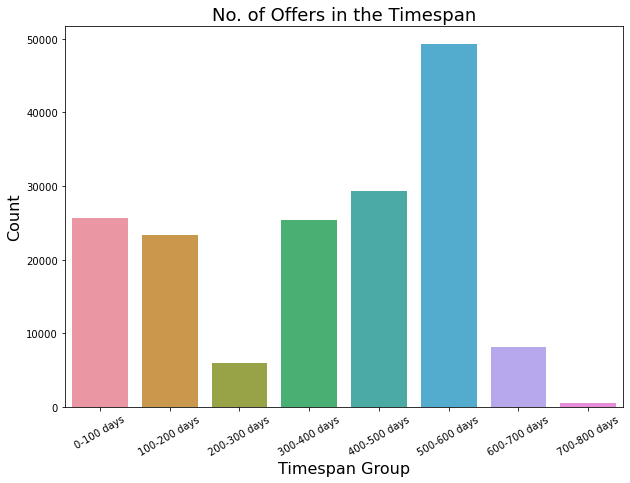

In [78]:
fig = plt.figure(figsize = (10,7))
sns.countplot(x='time_group',data=offer)
plt.xticks(rotation=30)
plt.title('No. of Offers in the Timespan', size = 18)
plt.xlabel('Timespan Group', size = 16)
plt.ylabel('Count', size = 16)
plt.savefig('./images/offers_timespan.png');

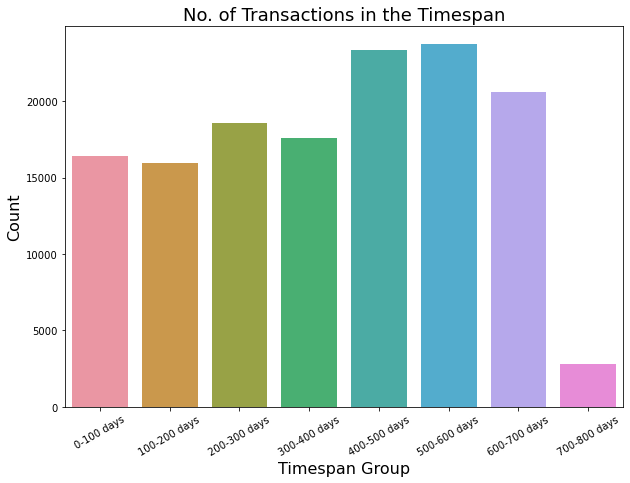

In [77]:
fig = plt.figure(figsize = (10,7))
sns.countplot(x='time_group',data=transaction)
plt.xticks(rotation=30)
plt.title('No. of Transactions in the Timespan', size = 18)
plt.xlabel('Timespan Group', size = 16)
plt.ylabel('Count', size = 16);
plt.savefig('./images/transactions_timespan.png');

In [81]:
# Create new age_group column by binning Age into different groups
profile['age_group'] = pd.cut(x=profile['age_modified'], bins=[18, 20, 40, 60, 80, 101],
                    labels=['Youth(0-19)', 'Young_Adult(20-39)', 'Middle-Age(40-59)',
                            'Senior(60-79)', 'Geriatric(80-100)'], include_lowest=True)

# profile['age_group'] = pd.cut(x=profile['age_modified'], bins=[18, 20, 40, 60, 80, 101],
#                     labels=[1,2,3,4,5], include_lowest=True)
profile['age_group'].value_counts(normalize=True)

Middle-Age(40-59)     0.404294
Senior(60-79)         0.307647
Young_Adult(20-39)    0.199235
Geriatric(80-100)     0.066059
Youth(0-19)           0.022765
Name: age_group, dtype: float64

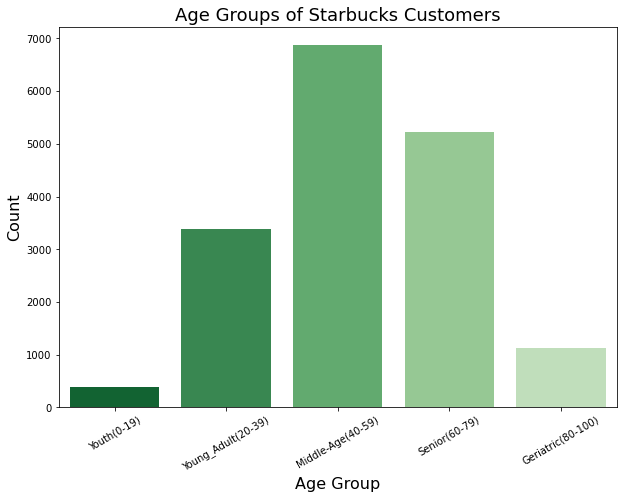

In [79]:
fig = plt.figure(figsize = (10,7))
sns.countplot(x='age_group',data=profile)
plt.xticks(rotation=30)
plt.title('Age Groups of Starbucks Customers', size = 18)
plt.xlabel('Age Group', size = 16)
plt.ylabel('Count', size = 16)
plt.savefig('./images/age_groups.png');

In [ ]:
profile.groupby('gender_modified').sum()['income_modified'].plot(kind='bar')
plt.title('Total Income per Gender')
plt.ylabel('Income')
plt.xlabel('Gender');

Total income for Males is higher even though the number of females in the higher income (78k and above) are higher than males.

In [ ]:
# Membership registration through the years
profile['year'].value_counts().sort_index().plot()
plt.xlabel('Year')
plt.ylabel('New Members')
plt.title('Loyalty Program Registration per Year')

2017 was the highest year then membership declined the following year in 2018.

## Data Dictionary

|Feature|Type|Description|
|---|---|---|
|**Id**|*int*|Identification number for the property.|
|**SalePrice**|*float*|The property's sale price in dollars. This is the target variable|
|**Total SF**|*float*|Total combined sqft of livable space|